In [1]:
%matplotlib inline
#%matplotlib notebook
%config InlineBackend.figure_format='retina'

import cv2
from matplotlib import pyplot as plt
import numpy as np

In [2]:
sixteen_by_nine_bright = cv2.imread('../test_images/dim16by9.jpg', cv2.IMREAD_COLOR)
sixteen_by_nine_bright = cv2.cvtColor(sixteen_by_nine_bright, cv2.COLOR_BGR2RGB)

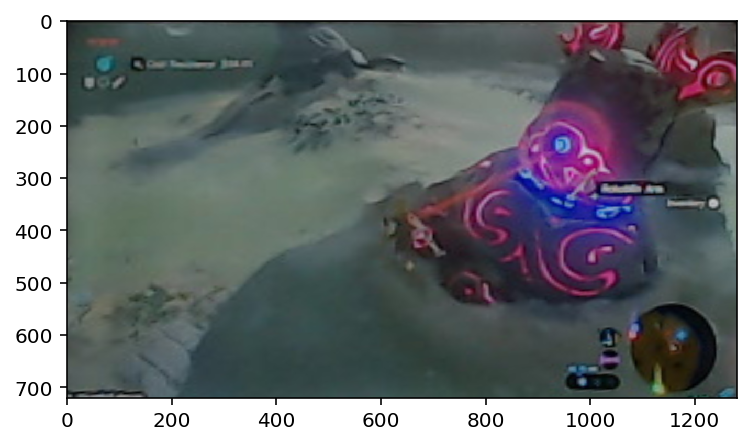

True

In [3]:
height, width, _ = sixteen_by_nine_bright.shape

tv_corners = np.float32([[390,270],[644,266],[390,437],[638,465]])
full_canvas = np.float32([[0,0],[width,0],[0,height],[width,height]])

M = cv2.getPerspectiveTransform(tv_corners, full_canvas)
dst = cv2.warpPerspective(sixteen_by_nine_bright, M, (width, height))

plt.imshow(dst)
plt.show()

cv2.imwrite("extracted.jpg", cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))

In [4]:
# Sample 9 blocks around the image
def extract_color_palette(img):
    return cv2.resize(img, (3, 3))
    height, width, depth = img.shape
        
    height_chunk = height // 3
    width_chunk = width // 3
    
    # 3x3 colors
    palette = np.empty((3, 3, depth))
    
    for i in range(3):
        for j in range(3):
            start_x = width_chunk * i
            start_y = height_chunk * j
                        
            color = np.median(img[start_y:start_y + height_chunk,
                                  start_x:start_x + width_chunk], axis=(0, 1))
            palette[j][i] = color

    return palette


palette = extract_color_palette(dst)

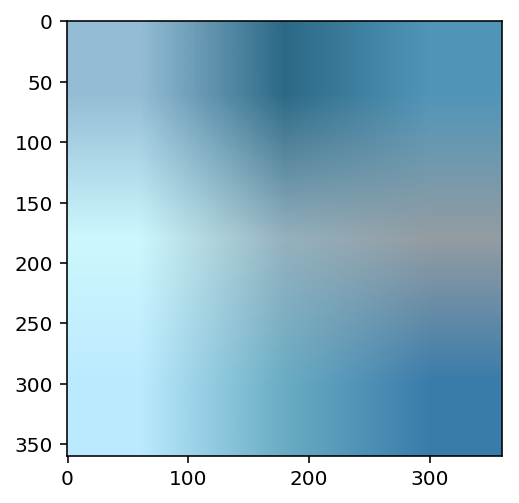

In [23]:
def visualize_palette(palette):
    larger = cv2.resize(palette, (360, 360), cv2.INTER_NEAREST).astype('uint8')
    gray = cv2.cvtColor(larger, cv2.COLOR_RGB2GRAY)

    plt.imshow(larger)
    plt.show()
    
visualize_palette(palette)

# Black Bar / Aspect Ratio detection

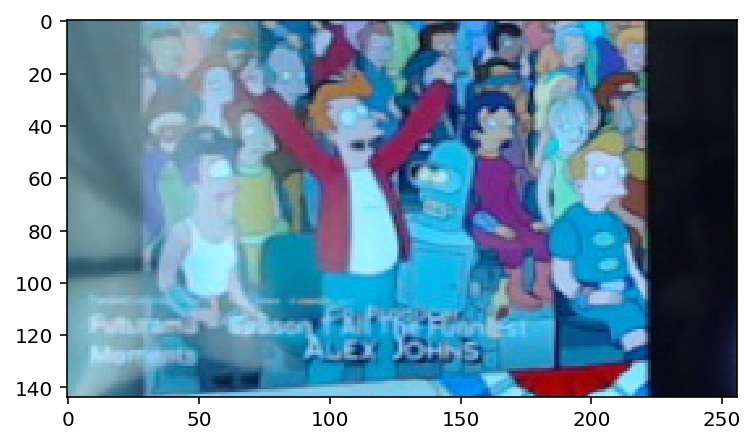

In [27]:
futurama_raw = cv2.imread('./futurama.jpg', cv2.IMREAD_COLOR)
futurama = cv2.cvtColor(futurama_raw, cv2.COLOR_BGR2RGB)

plt.imshow(futurama)
plt.show()

## Without detection

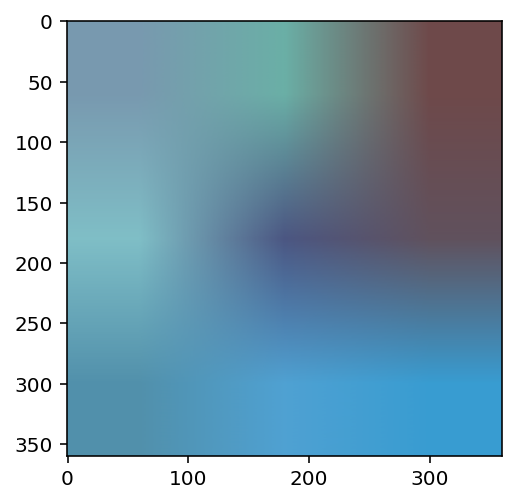

In [28]:
palette = extract_color_palette(futurama)
visualize_palette(palette)

## With detection

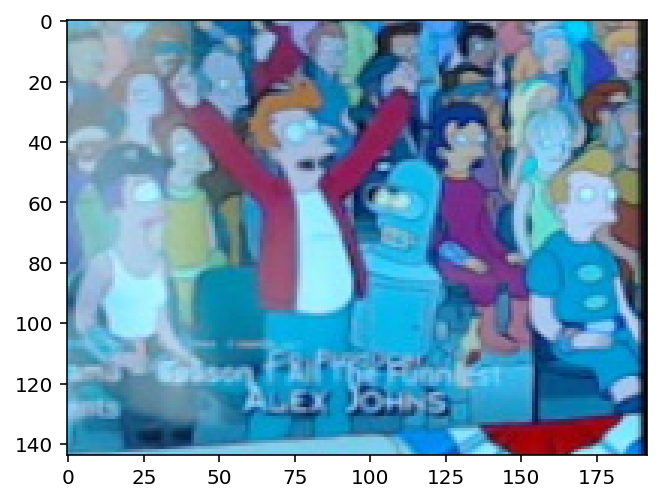

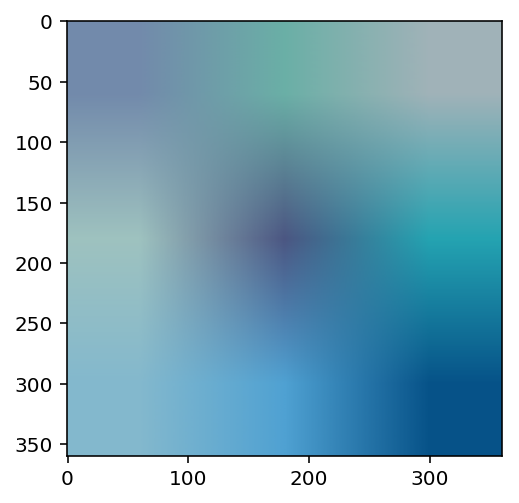

In [35]:
# Crop 4:3 image out
width = futurama.shape[1]
black_width = width // 8

futurama_cropped = futurama[:,black_width:-black_width]
plt.imshow(futurama_cropped)
plt.show()

palette = extract_color_palette(futurama_cropped)
visualize_palette(palette)